# Exploratory Data Analysis (EDA) on "Car Price Prediction Multiple Linear Regression" Dataset 
https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

## Problem Statement
Geely Auto, a Chinese automobile manufacturer, aims to expand into the US market by establishing a manufacturing unit to produce cars domestically. Their objective is to compete with American and European car brands by understanding what influences car prices in the American market. To achieve this, Geely has hired an automobile consulting company to analyze factors that affect car pricing in the US, as these may differ significantly from those in China. The consulting firm has gathered a comprehensive dataset covering various car types in the American market.

## Business Goal
The primary objective is to create a model that accurately predicts car prices based on multiple independent variables. This model will empower management to:
* Understand the relationship between car features and pricing
* Make strategic decisions regarding car design and business approaches to achieve target price levels
* Gain insights into the pricing structure of the US market

In [65]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [33]:
df = pd.read_csv("./data/car/CarPrice_Assignment.csv")
df.head()
df.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

In [14]:
df.shape

(205, 26)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [17]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Step 1: Cleaning Data
### Will Drop These Columns
1. car Id
2. symboling
لأنه لا يرتبط بشكل مباشر بسعر السيارة. فهو متغير فئوي يمثل تصنيف مخاطر التأمين، والذي لا يعد مؤشراً قوياً على قيمة السيارة السوقية.
3. CarName

In [36]:
# Drop car Id
# df = df.drop(['car_ID'], axis=1)
df.drop(['car_ID','symboling'],axis=1,inplace=True)
df.head()

CarName  CompanyName fueltype aspiration doornumber  \
0        alfa-romero giulia  alfa-romero      gas        std        two   
1       alfa-romero stelvio  alfa-romero      gas        std        two   
2  alfa-romero Quadrifoglio  alfa-romero      gas        std        two   
3               audi 100 ls         audi      gas        std       four   
4                audi 100ls         audi      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

## Add Feature 

### Extracting car company from car name


In [37]:
# df['CarName'] = df['CarName'].str.split(' ').str[0]
# Or you can use lambda
companyName = df['CarName'].apply(lambda x: x.split(' ')[0])
# df.insert(3,'CompanyName',companyName)
# df = df.drop(['CarName'], axis=1)

df.head()

CarName  CompanyName fueltype aspiration doornumber  \
0        alfa-romero giulia  alfa-romero      gas        std        two   
1       alfa-romero stelvio  alfa-romero      gas        std        two   
2  alfa-romero Quadrifoglio  alfa-romero      gas        std        two   
3               audi 100 ls         audi      gas        std       four   
4                audi 100ls         audi      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

In [31]:
df.columns

Index(['fueltype', 'aspiration', 'CompanyName', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## Handling Duplicate Values in Car Name

**Problem:**

Some car names have multiple variations that should be considered identical:

* `nissan` and `Nissan`
* `toyota` and `toyouta`
* `vokswagen`, `volkswagen`, and `vw`
* `mazda` and `maxda`
* `porcshce` and `porsche`

### visualizations for detecting duplicate car names

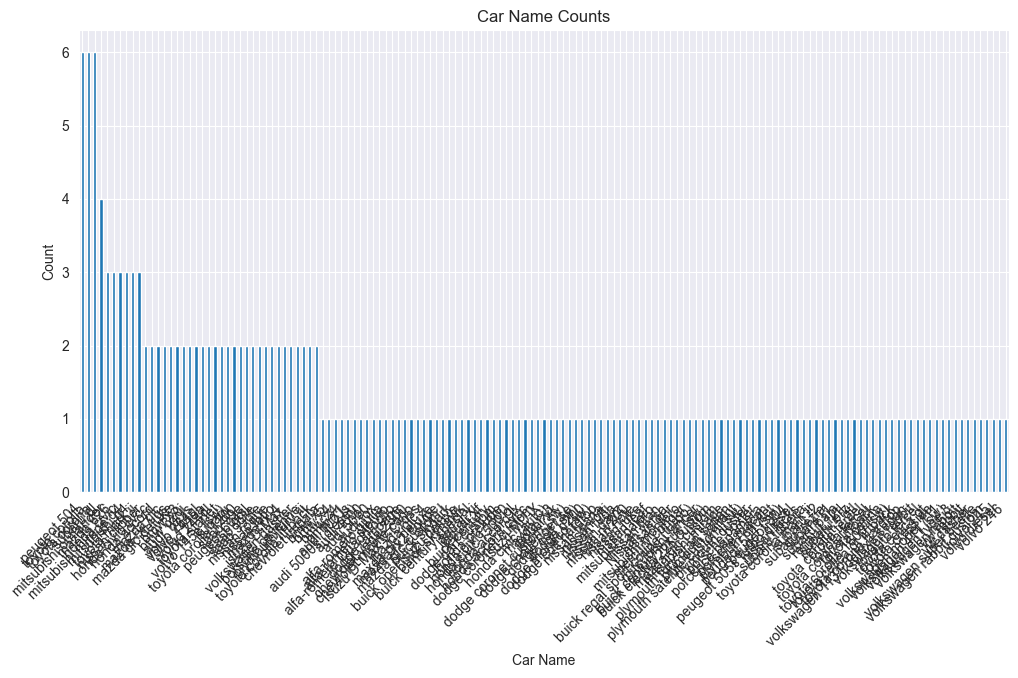

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CarName', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Car Names')
plt.xlabel('CarName')
plt.ylabel('Count')
plt.show()

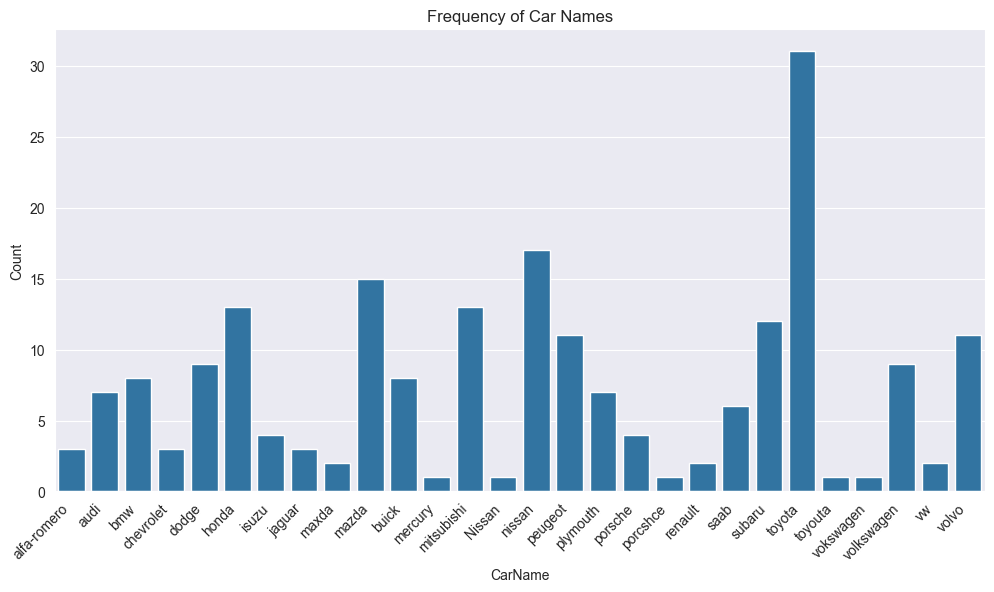

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CompanyName', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Car Names')
plt.xlabel('CarName')
plt.ylabel('Count')
plt.show()

In [43]:
plt.figure(figsize=(12, 6))
df['CompanyName'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Car Name Counts')
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.show()

#### Handling duplicate values in car name

In [48]:
df['CompanyName'] = df['CompanyName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta':'toyota','vokswagen': 'volkswagen', 'vw': 'volkswagen'})

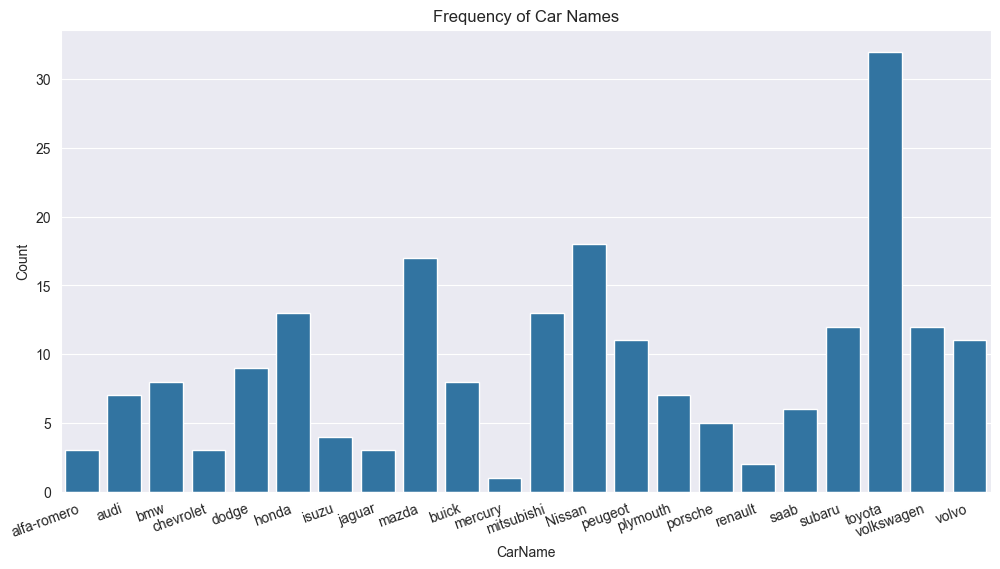

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CompanyName', data=df)
plt.xticks(rotation=20, ha='right')
plt.title('Frequency of Car Names')
plt.xlabel('CarName')
plt.ylabel('Count')
plt.show()

## Categorical columns

In [54]:
categorical_cols=df.select_dtypes(include=['object']).columns
df[categorical_cols].head(10)

CarName  CompanyName fueltype aspiration doornumber  \
0        alfa-romero giulia  alfa-romero      gas        std        two   
1       alfa-romero stelvio  alfa-romero      gas        std        two   
2  alfa-romero Quadrifoglio  alfa-romero      gas        std        two   
3               audi 100 ls         audi      gas        std       four   
4                audi 100ls         audi      gas        std       four   
5                  audi fox         audi      gas        std        two   
6                audi 100ls         audi      gas        std       four   
7                 audi 5000         audi      gas        std       four   
8                 audi 4000         audi      gas      turbo       four   
9       audi 5000s (diesel)         audi      gas      turbo        two   

       carbody drivewheel enginelocation enginetype cylindernumber fuelsystem  
0  convertible        rwd          front       dohc           four       mpfi  
1  convertible        rwd          front       dohc           four       mpfi  
2    hatchback        rwd          front       ohcv            six       mpfi  
3        sedan        fwd          front        ohc           four       mpfi  
4        sedan        4wd          front        ohc           five       mpfi  
5        sedan        fwd          front        ohc           five       mpfi  
6        sedan        fwd          front        ohc           five       mpfi  
7        wagon        fwd          front        ohc           five       mpfi  
8        sedan        fwd          front        ohc           five       mpfi  
9    hatchback        4wd          front        ohc           five       mpfi

## Numerical columns

In [56]:
numerical_cols=df.select_dtypes(exclude=['object']).columns
df[numerical_cols].head(10)

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   
5       99.8      177.3      66.3       53.1        2507         136   
6      105.8      192.7      71.4       55.7        2844         136   
7      105.8      192.7      71.4       55.7        2954         136   
8      105.8      192.7      71.4       55.9        3086         131   
9       99.5      178.2      67.9       52.0        3053         131   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   
5       3.19    3.40               8.5         110     5500       19   
6       3.19    3.40               8.5         110     5500       19   
7       3.19    3.40               8.5         110     5500       19   
8       3.13    3.40               8.3         140     5500       17   
9       3.13    3.40               7.0         160     5500       16   

   highwaympg      price  
0          27  13495.000  
1          27  16500.000  
2          26  16500.000  
3          30  13950.000  
4          22  17450.000  
5          25  15250.000  
6          25  17710.000  
7          25  18920.000  
8          20  23875.000  
9          22  17859.167

In [15]:
# حساب القيم المفقودة في كل عمود
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

## Step 2: Descriptive Statistics


In [57]:
# Descriptive statistics for numerical columns
df.describe()

wheelbase   carlength    carwidth   carheight   curbweight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       enginesize   boreratio      stroke  compressionratio  horsepower  \
count  205.000000  205.000000  205.000000        205.000000  205.000000   
mean   126.907317    3.329756    3.255415         10.142537  104.117073   
std     41.642693    0.270844    0.313597          3.972040   39.544167   
min     61.000000    2.540000    2.070000          7.000000   48.000000   
25%     97.000000    3.150000    3.110000          8.600000   70.000000   
50%    120.000000    3.310000    3.290000          9.000000   95.000000   
75%    141.000000    3.580000    3.410000          9.400000  116.000000   
max    326.000000    3.940000    4.170000         23.000000  288.000000   

           peakrpm     citympg  highwaympg         price  
count   205.000000  205.000000  205.000000    205.000000  
mean   5125.121951   25.219512   30.751220  13276.710571  
std     476.985643    6.542142    6.886443   7988.852332  
min    4150.000000   13.000000   16.000000   5118.000000  
25%    4800.000000   19.000000   25.000000   7788.000000  
50%    5200.000000   24.000000   30.000000  10295.000000  
75%    5500.000000   30.000000   34.000000  16503.000000  
max    6600.000000   49.000000   54.000000  45400.000000

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df['CompanyName'].value_counts().reset_index()
df1.columns = ['car_name', 'count']  # إعادة تسمية الأعمدة

# التأكد من الأعمدة بعد إعادة التسمية
print(df1.head())

# df1 = pd.DataFrame(df['CarName'].value_counts()).reset_index().rename(columns={'index': 'carname', 'CarName': 'count'})
# 
# # نشوف الـ DataFrame عشان نتأكد من الأعمدة
# print(df1.head(10))
# df.columns


     car_name  count
0      toyota     32
1      Nissan     18
2       mazda     17
3  mitsubishi     13
4       honda     13


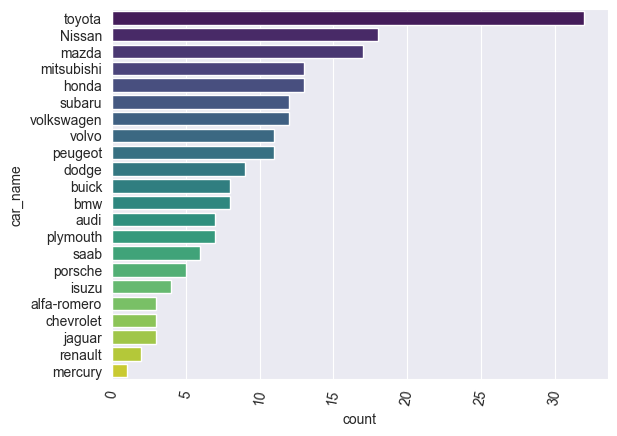

In [86]:
# plt.figure(figsize=(10, 8))
# plot = sns.barplot(y='car_name', x='count', data=df1)
# 
# plt.show()
# plot = sns.barplot(y='car_name',x='count',data=df1, palette="viridis")
# plot=plt.setp(plot.get_xticklabels(), rotation=10)

plot = sns.barplot(y='car_name', x='count', data=df1, hue='car_name', dodge=False, palette="viridis")
# plot.legend_.remove() 

# ضبط دوران تسميات المحور السيني (لو لزم الأمر)
plt.setp(plot.get_xticklabels(), rotation=80)

plt.show()

 ## The Key Points From The Above Chart:

**Most Suitable Car:** Toyota

**Least Suitable Car:** Mercury


### Fuel type Ratio

In [88]:
df1 = pd.DataFrame(df['fueltype'].value_counts())
print(df1)

          count
fueltype       
gas         185
diesel       20


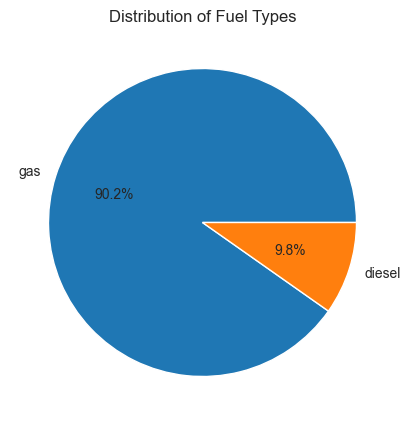

In [99]:
fuel_counts = df['fueltype'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Fuel Types')
plt.show()

**Most of the car has gas fuel**

### Price distribution of cars

<Axes: xlabel='price', ylabel='Count'>

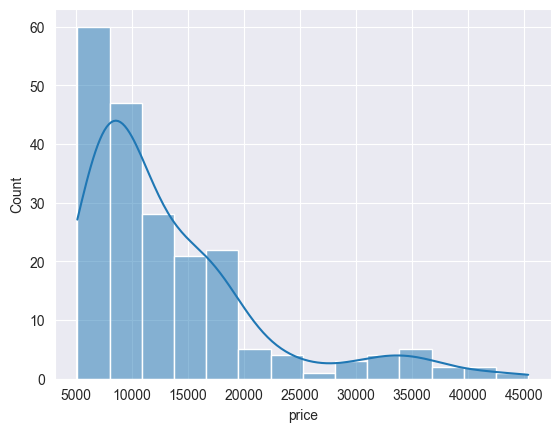

In [103]:
sns.histplot(df['price'],kde=True)

Price distribution plot is **right skewed**

The right-skewed distribution indicates that the majority of items or products being sold are priced relatively low. There are a few items with significantly higher prices, which are pulling the average price upwards. This suggests that there might be a few high-end or premium items in the dataset that are influencing the overall distribution.


#### Additional Insights:

**Mode:** The most frequent price range appears to be between $5,000  and $10,000, based on the tallest bar in the histogram.

**Outliers:** There are two potential outliers visible at the far right of the chart, indicating prices significantly higher than the rest of the data.

**Skewness:** The right-skewness suggests that the mean price is likely higher than the median price due to the influence of those high-priced items.

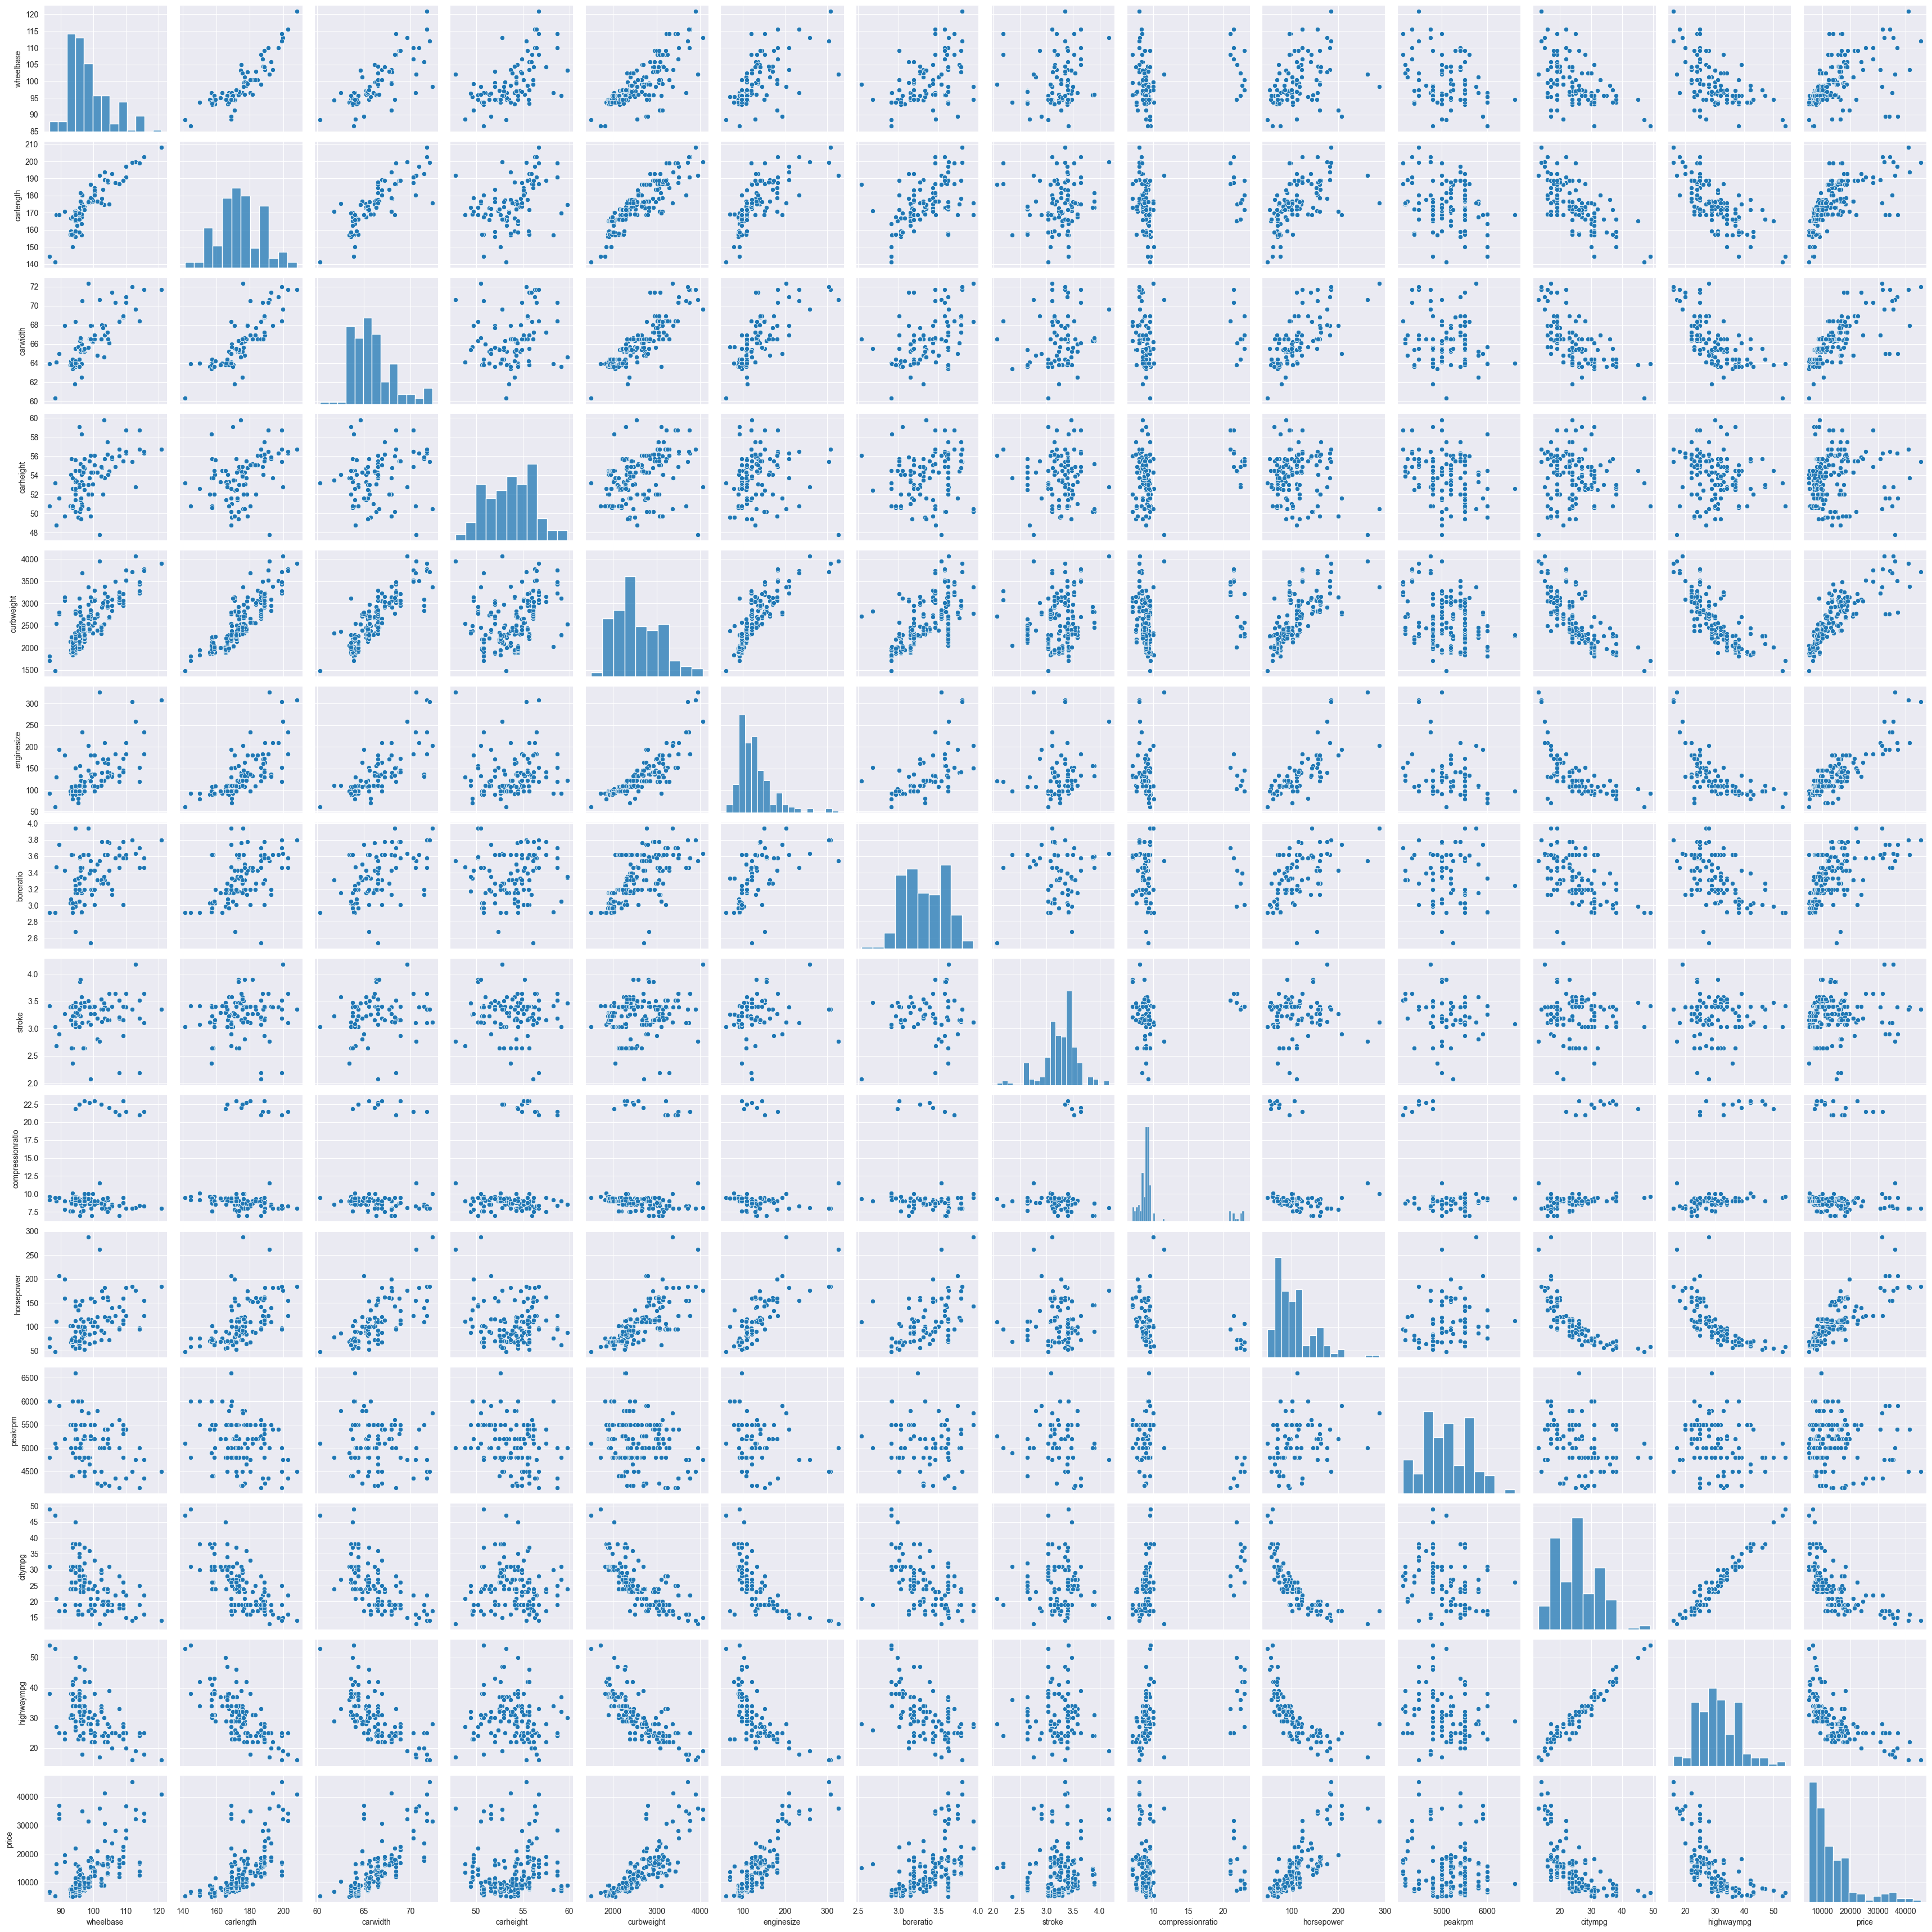

In [104]:
ax = sns.pairplot(df[numerical_cols])

### Scatter plot of wheelbase , carlength,carheight and carweight with price

In [105]:
col=['wheelbase','carlength','carwidth','curbweight','price']

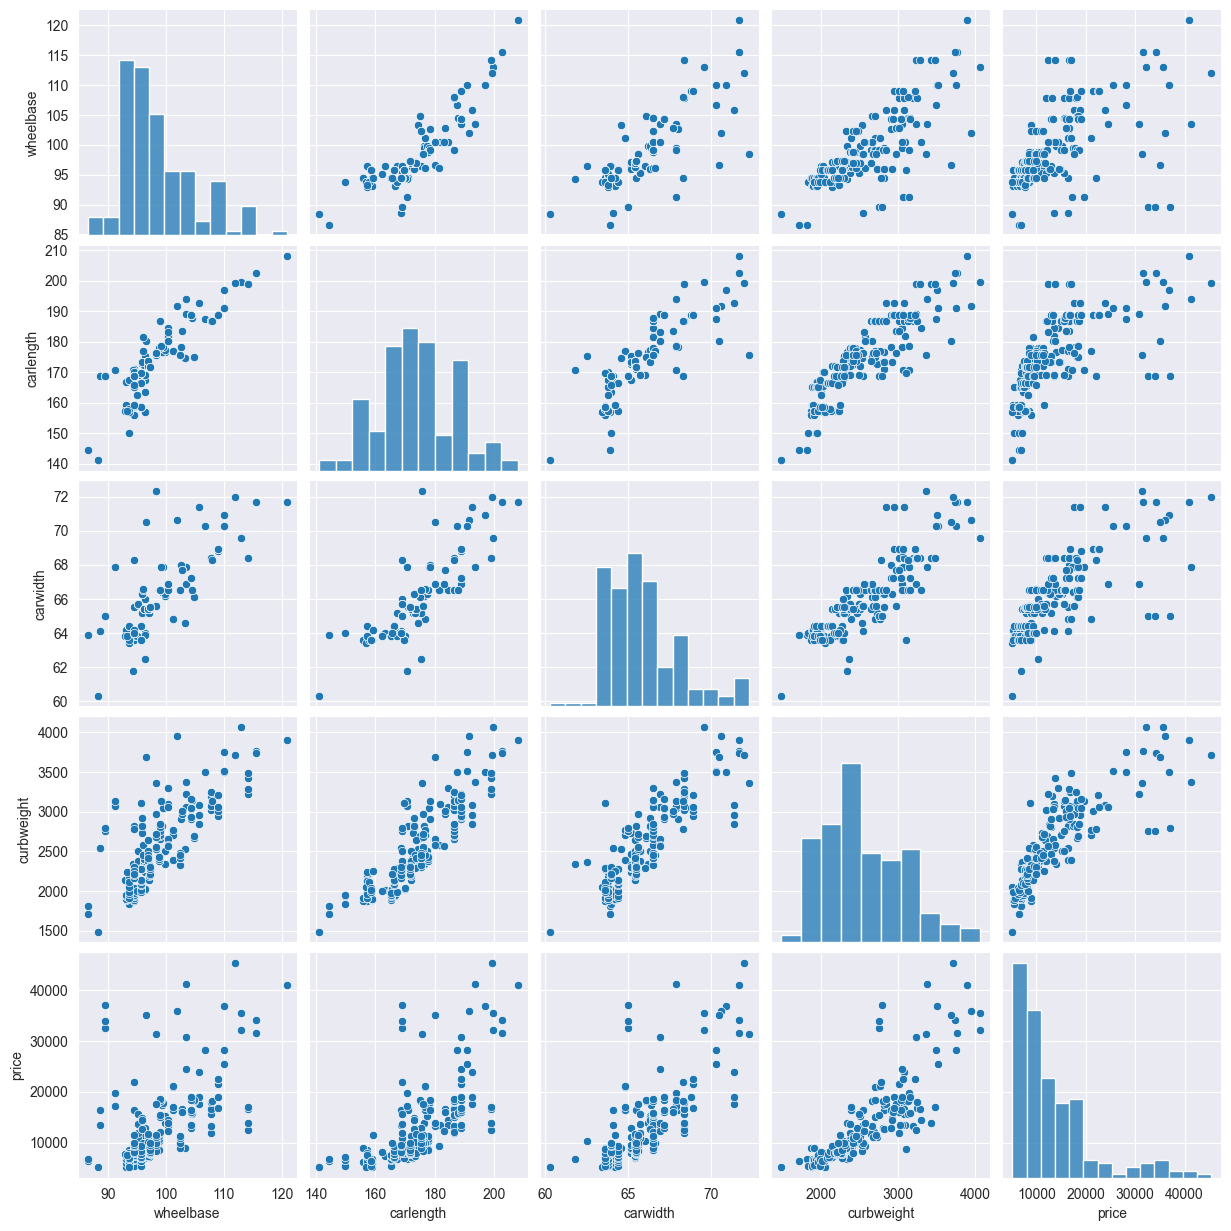

In [107]:
sns.pairplot(df[col])

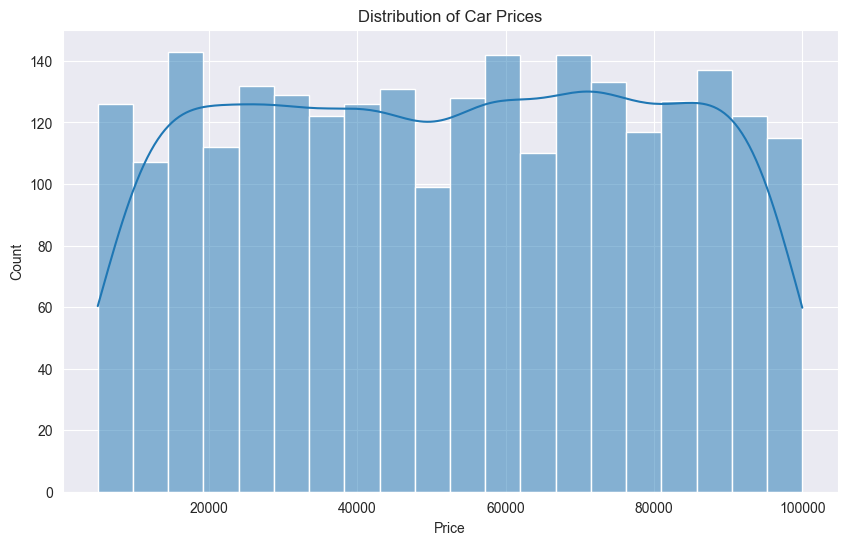

In [26]:
# توزيع الأسعار
plt.figure(figsize=(10, 6))
#sns.histplot(df['Price'], bins=30)
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.show()

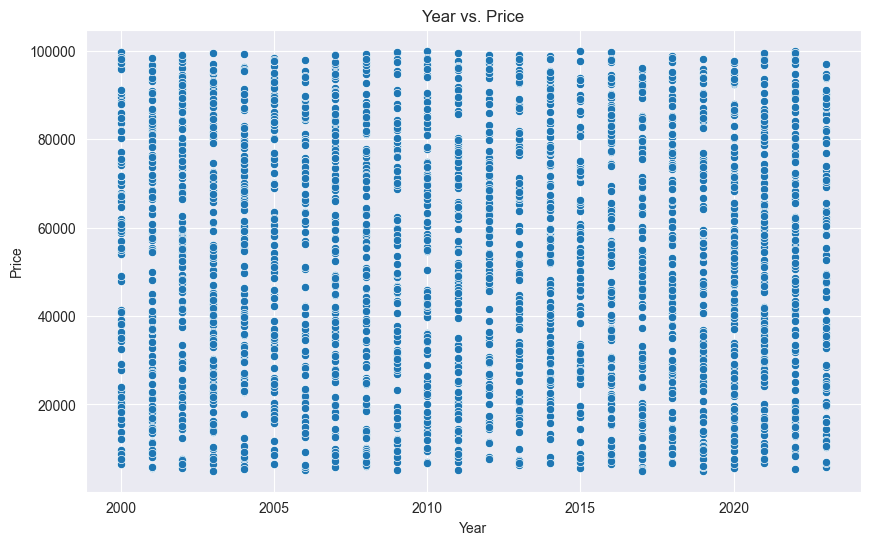

In [22]:
# العلاقة بين السنة والسعر
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Year vs. Price')
plt.show()

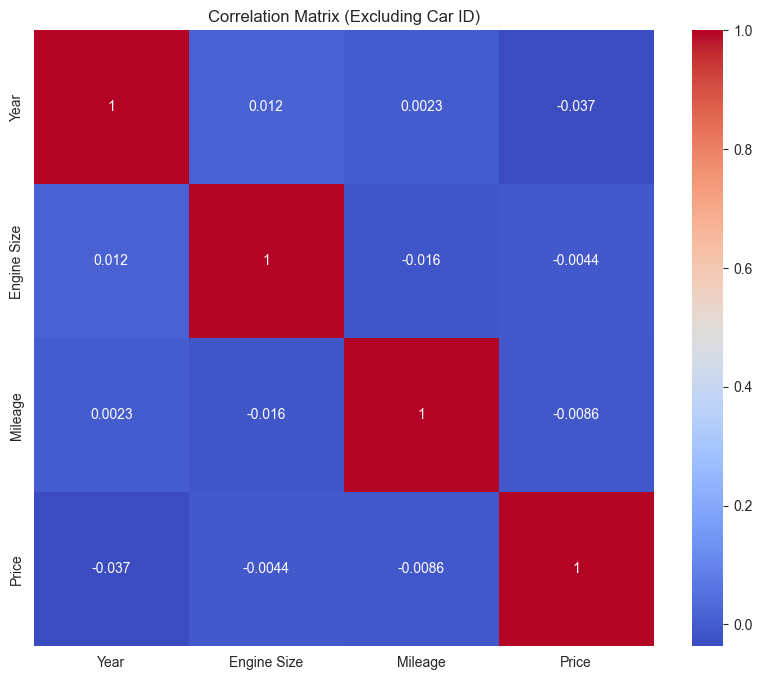

In [28]:
# اختيار الأعمدة الرقمية فقط واستبعاد Car ID
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Car ID')  # استبعاد عمود Car ID

# مصفوفة الترابط
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Excluding Car ID)')
plt.show()

In [24]:
# العلاقة بين الماركة والسعر
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Brand vs. Price')
plt.show()

## الخطوة 6: استخراج الأنماط والملاحظات


شو العوامل اللي الها التأثير الأكبر على السعر؟

شو العلاقات الواضحة اللي بين البيانات؟



In [4]:
sns.pairplot(df)